### Regresion Logistica - By: Martha Jimenez Rojas (Tarea 5 - Proyecto Analisis de Datos)

In [45]:
# Se cargarn las librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [47]:
# Se carga el datasel Titanic
datosTD = pd.read_csv('D:/tarea_5/Titanic-Dataset.csv')

In [49]:
# Se visualizan los datos
datosTD.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
# Se observa la descripcion de los Datos
datosTD.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

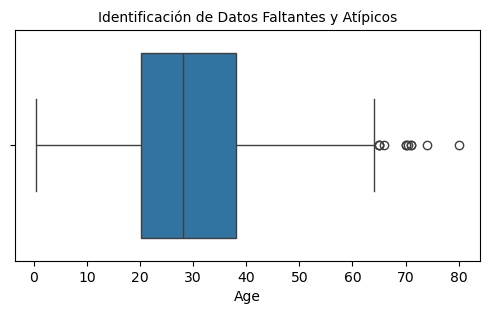

In [53]:
# Se identifican los Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datosTD['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )


In [55]:
# Se revisian los datos faltantes

print("Cantidad de Registros con cero en Age (Edad): ",datosTD['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",datosTD['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",datosTD['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Sex: ",datosTD['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarked: ",datosTD['Embarked'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabin: ",datosTD['Cabin'].isin([0]).sum())



Cantidad de Registros con cero en Age (Edad):  0
Cantidad de Registros con cero en Fare:  15
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Sex:  0
Cantidad de Registros con cero en Embarked:  0
Cantidad de Registros con cero en Cabin:  0


In [57]:
# Se reemplazan los datos faltantes
datosTD['Fare']=datosTD['Fare'].replace(0,datosTD['Fare'].mean())


In [59]:
# Se comprueban los valores faltantes
print("Cantidad de Registros con cero en Fare: ",datosTD['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Fare:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

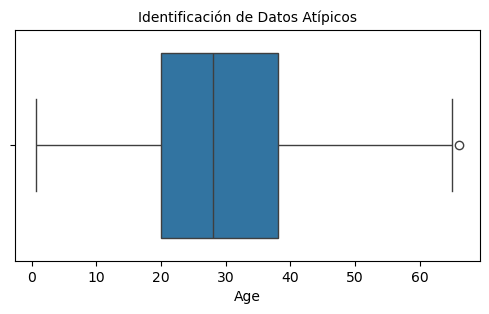

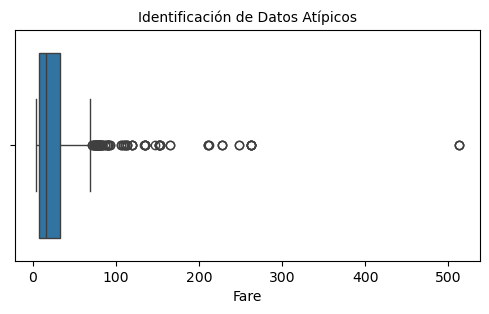

In [69]:
# Se identifican los de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datosTD['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=datosTD['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [75]:
# Se realiza el conteo de Datos Atípicos

nivel_minimo=0.5
nivel_maximo=70
Total_Atipicos=((datosTD['Age']<nivel_minimo)|(datosTD['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))


nivel_minimo2=4
nivel_maximo2=280
Total_Atipicos2=((datosTD['Fare']<nivel_minimo2)|(datosTD['Fare']>nivel_maximo2)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos2))

El total de datos atípicos es 0
El total de datos atípicos es 3


In [77]:
# Se filtran los datos Atípicos
datosTD=datosTD[(datosTD['Age']<nivel_maximo)&(datosTD['Age']>nivel_minimo)]
datosTD=datosTD[(datosTD['Fare']<nivel_maximo2)&(datosTD['Fare']>nivel_minimo2)]
# Se valida si se removieron los datos atípicos
Total_Atipicos=((datosTD['Age']<nivel_minimo)|(datosTD['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))
Total_Atipicos2=((datosTD['Fare']<nivel_minimo2)|(datosTD['Fare']>nivel_maximo2)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos2))

El total de datos atípicos es 0
El total de datos atípicos es 0


In [79]:
# Se revisa el tipo de datos y datos faltantes
datosTD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  703 non-null    int64  
 1   Survived     703 non-null    int64  
 2   Pclass       703 non-null    int64  
 3   Name         703 non-null    object 
 4   Sex          703 non-null    object 
 5   Age          703 non-null    float64
 6   SibSp        703 non-null    int64  
 7   Parch        703 non-null    int64  
 8   Ticket       703 non-null    object 
 9   Fare         703 non-null    float64
 10  Cabin        180 non-null    object 
 11  Embarked     701 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.4+ KB


In [85]:
# Se visualiza el resultado de salvacion del total de personas
datosTD['Survived'].value_counts()


Survived
0    418
1    285
Name: count, dtype: int64

In [87]:
datosTD[['Survived']].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
7,0
8,1
9,1
10,1


In [109]:
# Se eliminan columnas irrelevantes
columnas_irrelevantes = ['Name', 'Ticket', 'Cabin']
datosTD = datosTD.drop(columnas_irrelevantes, axis=1, errors='ignore')

# Se convierten la variables categóricas en numéricas
datosTD = pd.get_dummies(datosTD, columns=['Sex', 'Embarked'], drop_first=True)

# 3. Verificar que no quedan columnas no numéricas
print("Tipos de datos después de la conversión:")
print(datosTD.dtypes)



Tipos de datos después de la conversión:
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [111]:
# Se divide el dataset (Entrenamiento 75% y prueba 25%

# Se crean las variables X y Y para almacenar la información del entrenamiento
X = datosTD.drop('Survived',axis=1)
Y = datosTD['Survived']

# Se llama la funcion train_test_split para dividir el conjunto de datos (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [113]:
# Se viisualiza el conjunto de datos train
print (X_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
332          333       1  38.0      0      1  153.4625      True       False   
729          730       3  25.0      1      0    7.9250     False       False   
25            26       3  38.0      1      5   31.3875     False       False   
858          859       3  24.0      0      3   19.2583     False       False   
635          636       2  28.0      0      0   13.0000     False       False   
..           ...     ...   ...    ...    ...       ...       ...         ...   
685          686       2  25.0      1      2   41.5792      True       False   
213          214       2  30.0      0      0   13.0000      True       False   
632          633       1  32.0      0      0   30.5000      True       False   
41            42       2  27.0      1      0   21.0000     False       False   
501          502       3  21.0      0      0    7.7500     False        True   

     Embarked_S  
332        True  
729

In [115]:
# Se viisualiza el conjunto de datos test
print (Y_test)

102    0
867    0
551    0
234    0
435    1
      ..
155    0
412    1
165    1
618    1
184    1
Name: Survived, Length: 176, dtype: int64


In [117]:
# Se construye el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   

# Se crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [120]:
print (Y_test)


102    0
867    0
551    0
234    0
435    1
      ..
155    0
412    1
165    1
618    1
184    1
Name: Survived, Length: 176, dtype: int64


In [122]:

print (Prediccion)

[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]


In [124]:
# Se evalua el desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.82      0.72      0.77        71

    accuracy                           0.82       176
   macro avg       0.82      0.81      0.81       176
weighted avg       0.82      0.82      0.82       176



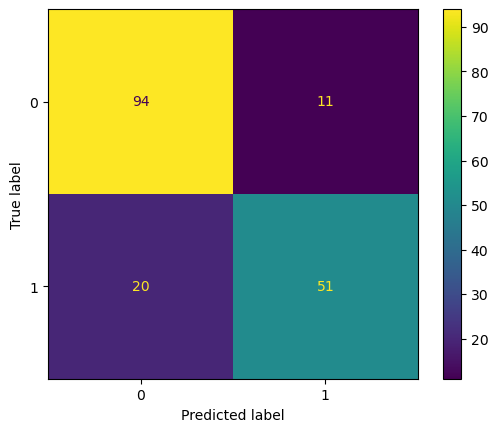

In [126]:
# Se emplea la Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


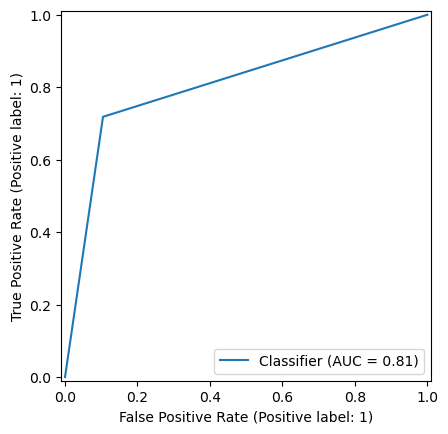

In [128]:
# Se emplea la curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()